# Stellar Luminosity with one feature

## 1. Imports and dataset

For this, it's necessary make the propper imports and the adecuate prepairing for the dataset:


In [13]:

# Install required libraries (run this once if needed)
%pip install numpy pandas matplotlib


Note: you may need to restart the kernel to use updated packages.


In [14]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

np.set_printoptions(precision=4, suppress=True)


In [15]:
M = np.array([0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4])
L = np.array([0.15, 0.35, 1.00, 2.30, 4.10, 7.00, 11.2, 17.5, 25.0, 35.0])

## Dataset visualitation
Now its mandatory to see the relation M vs L, for this, a graphic it's the better option, so:

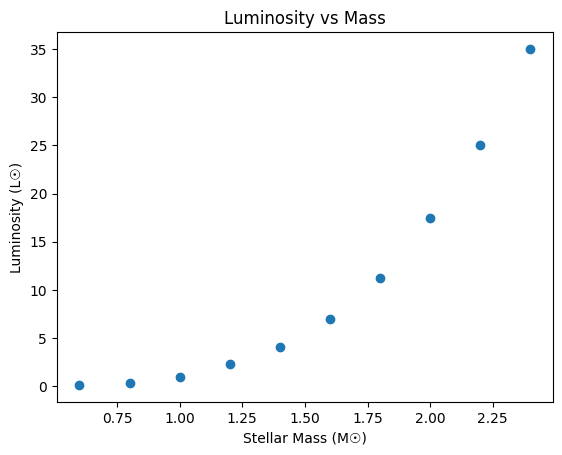

In [16]:
plt.scatter(M, L)
plt.xlabel("Stellar Mass (M☉)")
plt.ylabel("Luminosity (L☉)")
plt.title("Luminosity vs Mass")
plt.show()


The scatter plot shows stellar luminosity as a function of stellar mass. While luminosity increases monotonically with mass, the relationship is clearly nonlinear.

For low-mass stars, luminosity increases slowly, while for higher-mass stars the increase becomes much steeper. This behavior is consistent with astrophysical theory: main-sequence stellar luminosity follows an approximate power-law relationship with mass rather than a linear one.

Despite this limitation, a linear model provides a useful baseline. It allows us to study optimization behavior, convergence properties, and model bias in a controlled and interpretable setting.

## 3. Model Definition (Hypothesis Function)
Here it's defined the linear regression hypothesis function, which models luminosity as an affine function of stellar mass.
The explicit bias term allows the regression line to shift vertically, increasing model flexibility.
Defining the model explicitly reinforces the connection between mathematical formulation and code implementation.

In [17]:
def predict(M, w, b):
    return w * M + b

def mse(y, y_hat):
    return np.mean((y - y_hat) ** 2)

def compute_cost(L, M, w, b):
    """
    Compute Mean Squared Error (MSE) cost.
    """
    predictions = predict(M, w, b)
    return mse(L, predictions)



## 4. Loss Function (Mean Squared Error)
The mean squared error is used to quantify the discrepancy between observed and predicted luminosity values.
This loss function penalizes larger errors more strongly and is differentiable, making it suitable for gradient-based optimization.
Using MSE aligns with standard regression practice in both scientific and enterprise contexts.

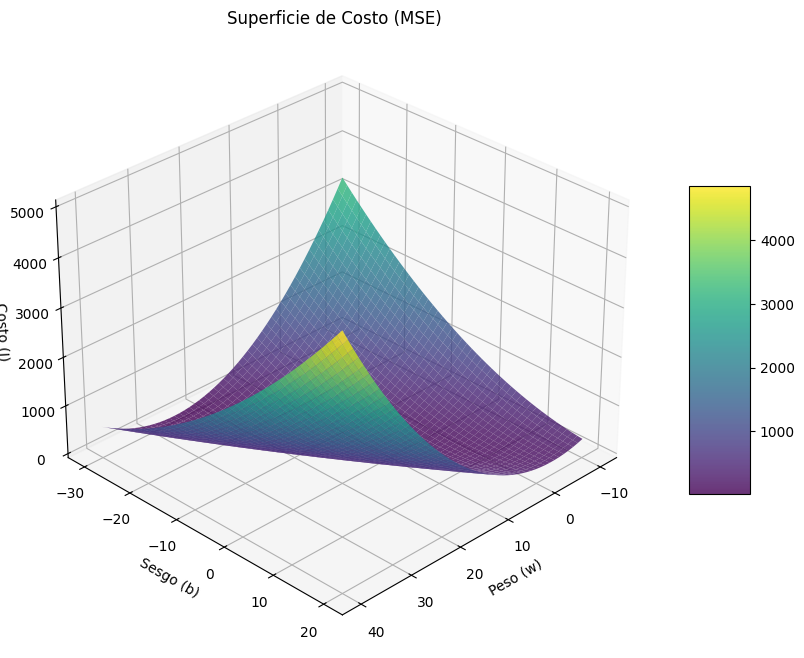

In [18]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define grid ranges for parameters w and b
w_vals = np.linspace(-10, 40, 50)
b_vals = np.linspace(-30, 20, 50)

# Create meshgrid
W, B = np.meshgrid(w_vals, b_vals)
J = np.zeros_like(W)

for i in range(W.shape[0]):
    for j in range(W.shape[1]):
        J[i, j] = mse(L, predict(M, W[i, j], B[i, j]))



# Configuración de la figura
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Creación de la superficie
# cmap='viridis' ayuda a ver mejor las profundidades (el error bajo)
surf = ax.plot_surface(W, B, J, cmap='viridis', edgecolor='none', alpha=0.8)

# Etiquetas de los ejes
ax.set_xlabel('Peso (w)')
ax.set_ylabel('Sesgo (b)')
ax.set_zlabel('Costo (J)')
ax.set_title('Superficie de Costo (MSE)')

# Añadir una barra de color para referencia
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

# Ajustar el ángulo de visión para apreciar la curvatura
ax.view_init(elev=30, azim=45)

plt.show()

## 5. Cost Surface Evaluation (MANDATORY)

In this section, the gradients of the cost function with respect to the model parameters 
𝑤 and 𝑏 are computed explicitly.

Starting from the mean squared error cost function, the gradients quantify how sensitive the cost is to small changes in each parameter.
The computation is performed using explicit loops over the training samples, which closely mirrors the mathematical definition of the partial derivatives and provides transparency into how each data point contributes to the overall gradient.

In [19]:
def compute_gradients(x_list, y_list, w, b):
    """Compute dJ/dw and dJ/db using explicit loops."""
    m_local = len(x_list)
    sum_dw = 0.0
    sum_db = 0.0

    for i in range(m_local):
        f_wb = w * x_list[i] + b
        error = f_wb - y_list[i]
        sum_dw += error * x_list[i]
        sum_db += error

    dj_dw = sum_dw / m_local
    dj_db = sum_db / m_local

    return dj_dw, dj_db


## 6 Gradient Descent (Non-Vectorized Implementation)
This section implements the gradient descent optimization algorithm using the gradients computed with explicit loops.

At each iteration, the parameters 
𝑤 and 𝑏 are updated by moving in the opposite direction of the gradient, scaled by the learning rate.

The cost function is evaluated at every step to monitor the convergence behavior of the algorithm and to verify that the optimization process is progressing toward a minimum.

Iteration    0: w= 4.4886, b= 2.5720, cost= 82.1152
Iteration  100: w=16.3228, b=-13.8407, cost= 20.7488
Iteration  200: w=17.8631, b=-16.3928, cost= 19.6156
Iteration  300: w=18.0908, b=-16.7700, cost= 19.5908
Iteration  400: w=18.1245, b=-16.8258, cost= 19.5903
Iteration  500: w=18.1294, b=-16.8340, cost= 19.5903
Iteration  600: w=18.1302, b=-16.8352, cost= 19.5903
Iteration  700: w=18.1303, b=-16.8354, cost= 19.5903
Iteration  800: w=18.1303, b=-16.8354, cost= 19.5903
Iteration  900: w=18.1303, b=-16.8355, cost= 19.5903

Learned parameters:
w = 18.130302968252515
b = -16.83545444264441


Text(0.5, 0, 'Iteration')

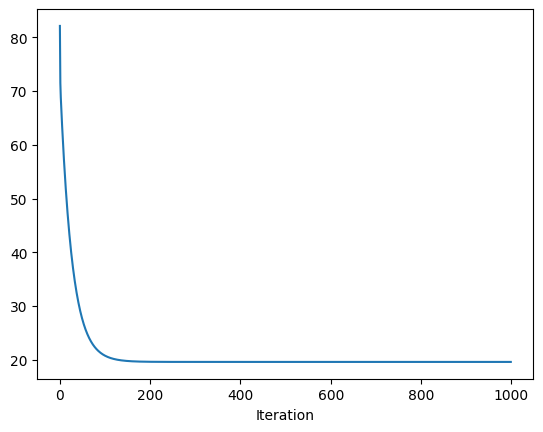

In [20]:
def gradient_descent(x_list, y_list, w_init, b_init, alpha, num_iterations):
    """Run gradient descent using explicit loops for gradients and cost."""
    w = w_init
    b = b_init

    history_iterations = []
    history_costs = []

    for i in range(num_iterations):
        dj_dw, dj_db = compute_gradients(x_list, y_list, w, b)

        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        cost = compute_cost(y_list, x_list, w, b)
        history_iterations.append(i)
        history_costs.append(cost)

        if i % max(1, num_iterations // 10) == 0:
            print(f"Iteration {i:4d}: w={w:7.4f}, b={b:7.4f}, cost={cost:8.4f}")

    return w, b, history_iterations, history_costs

alpha = 0.2
num_iterations = 1000

w_init = 1.0
b_init = 1.0

w_learned, b_learned, it_hist, cost_hist = gradient_descent(
    M, L, w_init, b_init, alpha, num_iterations
)

print("\nLearned parameters:")
print("w =", w_learned)
print("b =", b_learned)
plt.plot(it_hist, cost_hist)
plt.xlabel("Iteration")

## 7. Gradient Descent (Vectorized Implementation)
In this section, a vectorized version of gradient descent is implemented using NumPy operations.

Although the underlying mathematics is identical to the non-vectorized version, vectorization removes explicit Python loops and leverages optimized numerical routines.

This approach significantly improves computational efficiency and reflects standard practices used in large-scale and production-grade machine learning systems.


Learned parameters (vectorized):
w = 18.130302968252515
b = -16.83545444264441


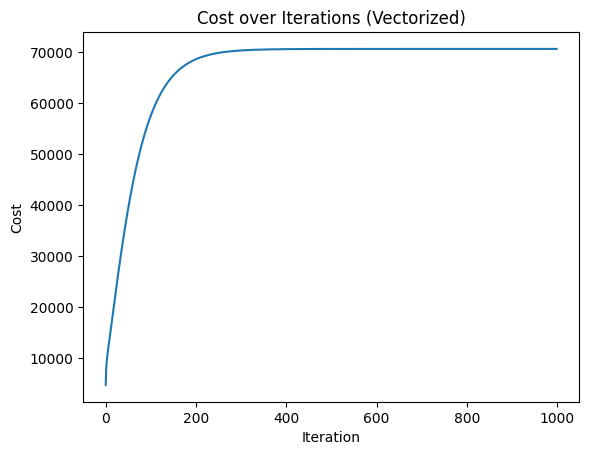

In [21]:
def compute_gradients_vectorized(x, y, w, b):
    errors = (w * x + b) - y
    dj_dw = np.mean(errors * x)
    dj_db = np.mean(errors)
    return dj_dw, dj_db

def gradient_descent_vectorized(x, y, w_init, b_init, alpha, num_iterations):
    w = w_init
    b = b_init

    history_costs = []

    for i in range(num_iterations):
        dj_dw, dj_db = compute_gradients_vectorized(x, y, w, b)

        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        history_costs.append(compute_cost(x, y, w, b))

    return w, b, history_costs
w_learned_vec, b_learned_vec, cost_hist_vec = gradient_descent_vectorized(
    M, L, w_init, b_init, alpha, num_iterations
)
print("\nLearned parameters (vectorized):")
print("w =", w_learned_vec)
print("b =", b_learned_vec)
plt.plot(range(num_iterations), cost_hist_vec)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Cost over Iterations (Vectorized)")
plt.show()


## 8. Experiments (Mandatory)

In this section, we experiment with different learning rates ($\alpha$) to observe how they affect convergence. We will run Gradient Descent with at least three different values of $\alpha$ and report the final parameters ($w, b$) and the final loss (Cost).

We will try:
- $\alpha = 0.01$ (Small step)
- $\alpha = 0.1$ (Moderate step)
- $\alpha = 0.2$ (Large step)

Alpha      Final w      Final b      Final Cost  
--------------------------------------------------
Iteration    0: w= 1.1744, b= 1.0786, cost=171.0126
Iteration  100: w= 6.6737, b= 1.8537, cost= 65.1668
Iteration  200: w= 7.8233, b= 0.2335, cost= 57.2346
Iteration  300: w= 8.7582, b=-1.3072, cost= 50.7375
Iteration  400: w= 9.6053, b=-2.7106, cost= 45.3618
Iteration  500: w=10.3758, b=-3.9872, cost= 40.9139
Iteration  600: w=11.0766, b=-5.1484, cost= 37.2336
Iteration  700: w=11.7141, b=-6.2047, cost= 34.1886
Iteration  800: w=12.2940, b=-7.1655, cost= 31.6690
Iteration  900: w=12.8215, b=-8.0394, cost= 29.5844
0.01       13.2967      -8.8268      27.8752     
Iteration    0: w= 2.7443, b= 1.7860, cost=117.5806
Iteration  100: w=13.3619, b=-8.9348, cost= 27.6532
Iteration  200: w=16.2886, b=-13.7841, cost= 20.7930
Iteration  300: w=17.4190, b=-15.6569, cost= 19.7697
Iteration  400: w=17.8556, b=-16.3803, cost= 19.6171
Iteration  500: w=18.0242, b=-16.6597, cost= 19.5943
Iteration  60

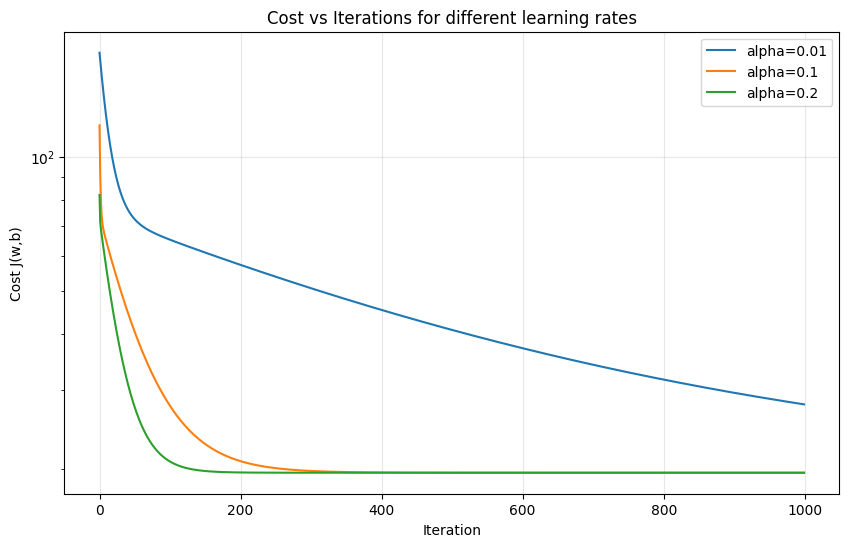

In [22]:
alphas = [0.01, 0.1, 0.2]
num_iterations = 1000
w_init = 1.0
b_init = 1.0

print(f"{'Alpha':<10} {'Final w':<12} {'Final b':<12} {'Final Cost':<12}")
print("-" * 50)

results = {}

plt.figure(figsize=(10, 6))

for alpha in alphas:
    # Reset initial values for each run
    w, b, it_hist, cost_hist = gradient_descent(M, L, w_init, b_init, alpha, num_iterations)
    
    # Store results
    results[alpha] = (w, b, cost_hist[-1])
    
    # Print summary row
    print(f"{alpha:<10} {w:<12.4f} {b:<12.4f} {cost_hist[-1]:<12.4f}")
    
    # Plot cost history
    plt.plot(it_hist, cost_hist, label=f"alpha={alpha}")

plt.xlabel("Iteration")
plt.ylabel("Cost J(w,b)")
plt.title("Cost vs Iterations for different learning rates")
plt.yscale("log") # Log scale helps see differences better if ranges vary
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

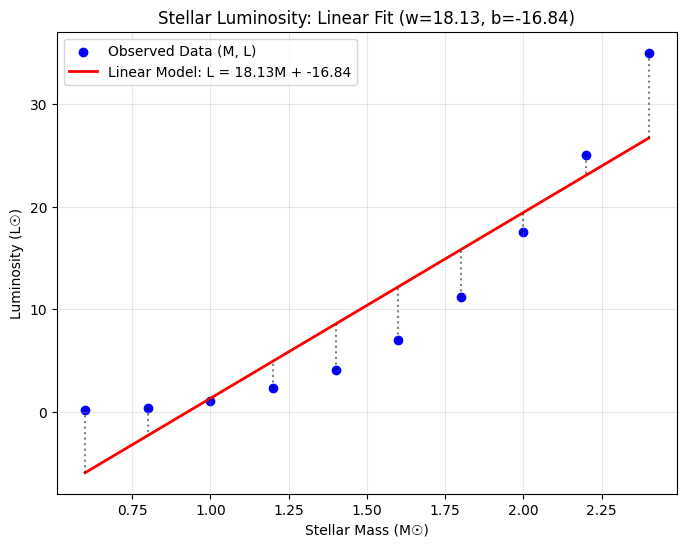

In [25]:
# Use the best parameters found (alpha=0.2)
best_alpha = 0.2
w_best, b_best, _ = gradient_descent_vectorized(M, L, 1.0, 1.0, best_alpha, 1000)

# Generate predictions line
m_range = np.linspace(M.min(), M.max(), 100)
l_pred_line = predict(m_range, w_best, b_best)

# Create the plot
plt.figure(figsize=(8, 6))
plt.scatter(M, L, color='blue', label='Observed Data (M, L)')
plt.plot(m_range, l_pred_line, color='red', linewidth=2, label=f'Linear Model: L = {w_best:.2f}M + {b_best:.2f}')

# Add predictions for specific points to highlight errors
l_pred_points = predict(M, w_best, b_best)
for i in range(len(M)):
    plt.plot([M[i], M[i]], [L[i], l_pred_points[i]], 'k:', alpha=0.5) # Error bars

plt.xlabel("Stellar Mass (M☉)")
plt.ylabel("Luminosity (L☉)")
plt.title(f"Stellar Luminosity: Linear Fit (w={w_best:.2f}, b={b_best:.2f})")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## 9. Final Fit Plot & Systematic Errors

We will now visualize the best model found (using $\alpha=0.2$) against the original data.

**Systematic Errors Discussion:**
The plot below will reveal the limitations of the linear model.
- **Low Mass Range:** The model might predict negative luminosity or underestimate the true value, as the curve is flat here.
- **High Mass Range:** The relationship $L \propto M^{3.5}$ grows much faster than linear. The line will likely underestimate the luminosity for the most massive stars.
- **Middle Range:** The line might overestimate luminosity as it tries to bridge the gap between low and high mass points.

This pattern of "under-over-under" estimation is a classic sign of **underfitting** (high bias). The model structure (a straight line) is too simple to capture the underlying physical law.

## 10. Conceptual Questions

### 1. Astrophysical meaning of w
In our linear model $L = w \cdot M + b$, the parameter $w$ represents the **rate of change of luminosity with respect to mass**. 
- Mathematically, it is the slope of the regression line.
- Astrophysically, it implies that for every 1 solar mass ($1 M_{\odot}$) increase in a star's mass, its luminosity increases by $w$ solar luminosities ($L_{\odot}$).
- However, since the true relationship is non-linear ($L \propto M^{3.5}$), $w$ is just an "average" rate of increase over the specific range of masses we observed ($0.6$ to $2.4 M_{\odot}$). It would be very different if we looked at a different mass range.

### 2. Why is a linear model limited here?
The linear model is fundamentally limited because the physical phenomenon is **non-linear**.
- **Main Sequence Physics:** The luminosity of Main Sequence stars is related to mass by a power law $L \propto M^{\alpha}$ (where $\alpha \approx 3.5$ for this range).
- **Consequence:** A straight line cannot fit a curve perfectly. As seen in the plot above, the model systematically underestimates luminosity for low and high masses and overestimates it in the middle.
- **Bias:** This huge "structural" error is called **bias**. No amount of extra data or finding "better" $w, b$ values using gradient descent can fix this. To improve the model, we would need to change the hypothesis function itself (e.g., to Polynomial Regression or log-log transformation).